## K Means Clustering and DBSCAN

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [34]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=4, random_state=42)

In [35]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [36]:
df

,Feature_1,Feature_2
0,-2.282534,-9.692815
1,-6.147668,1.755990
2,13.399091,-1.260023
3,-4.077630,3.160226
4,9.444735,0.340868
...,...,...
495,-1.282205,-3.181575
496,-2.817604,10.378894
497,3.296740,8.649256
498,-8.970519,-2.684073


In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [38]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


c:\Users\arish\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\arish\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\arish\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\arish\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans 

In [39]:
inertia

[999.9999999999993,
 528.8064432605648,
 294.43770686781863,
 250.4552469653445,
 216.88110656982602,
 185.274406751959,
 156.70879996290446,
 135.6260345311525,
 129.10396348239811,
 119.94101297104989]

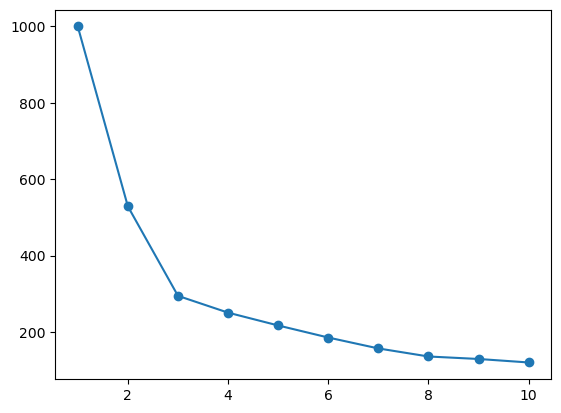

In [40]:
plt.plot(K_range, inertia, marker='o')

In [41]:
kmeans_final = KMeans(n_clusters=6, random_state=42)

In [42]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

c:\Users\arish\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [43]:
df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

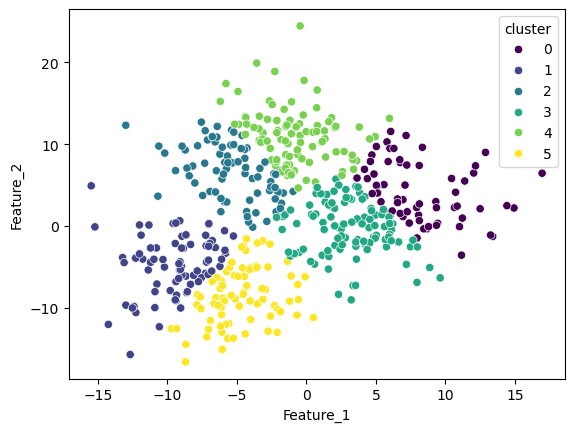

In [44]:
sns.scatterplot(x=df['Feature_1'],y=df['Feature_2'],hue=df['cluster'],palette='viridis')

## DBSCAN

In [45]:
from sklearn.datasets import make_moons

In [46]:
X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

In [47]:
from sklearn.cluster import KMeans, DBSCAN

In [48]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [50]:
kmeans_final = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_scaled)

c:\Users\arish\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [51]:
df['kmeans_cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

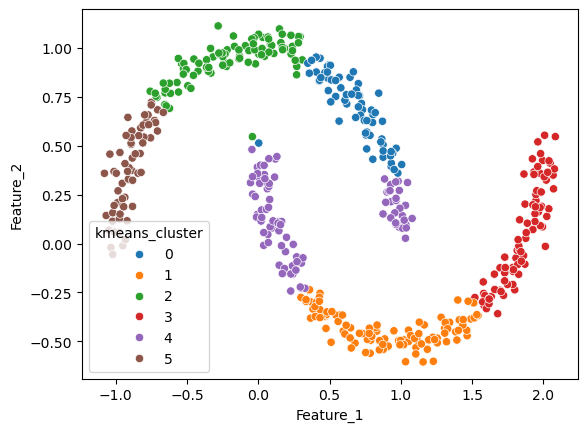

In [52]:
sns.scatterplot(x=df['Feature_1'],y=df['Feature_2'],hue=df['kmeans_cluster'],palette='tab10')

In [53]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [57]:
df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

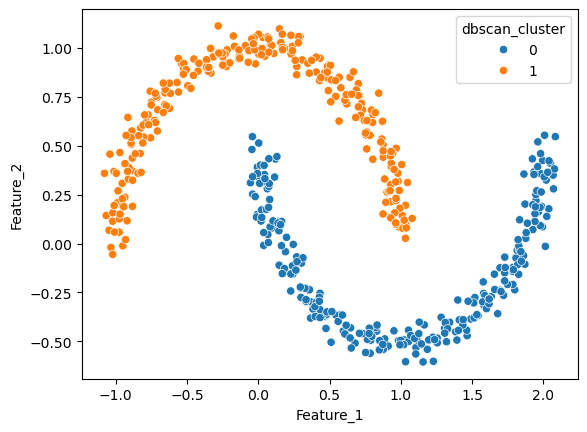

In [58]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['dbscan_cluster'], palette='tab10')